In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
def load_data(file_path):
    """Load the SMS spam dataset from the given file path."""
    data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
    return data

def preprocess_data(data):
    """Preprocess the data if needed (e.g., cleaning, normalization)."""
    # Convert labels to binary
    data['label'] = data['label'].map({'spam': 1, 'ham': 0})
    return data

def split_data(data):
    """Split the data into train, validation, and test sets."""
    train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['label'])
    validation_data, test_data = train_test_split(temp_data, test_size=0.3, random_state=42, stratify=temp_data['label'])

    return train_data, validation_data, test_data

def save_splits(train_data, validation_data, test_data):
    """Save the train, validation, and test splits to CSV files."""
    train_data.to_csv('train.csv', index=False)
    validation_data.to_csv('validation.csv', index=False)
    test_data.to_csv('test.csv', index=False)


In [17]:
def generate_wordcloud(df):
    spam_messages = df[df['label'] == 1]['message']
    stop_words = set(stopwords.words('english'))
    words = ' '.join(spam_messages).split()
    words = [word for word in words if word.lower() not in stop_words]

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Spam Messages')
    plt.show()

def plot_top_words(df, top_n=20):
    spam_messages = df[df['label'] == 1]['message']
    stop_words = set(stopwords.words('english'))
    words = ' '.join(spam_messages).split()
    words = [word.lower() for word in words if word.lower() not in stop_words]

    word_counts = Counter(words)
    common_words = word_counts.most_common(top_n)

    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.barh(words, counts, color='blue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {top_n} Words in Spam Messages')
    plt.gca().invert_yaxis()
    plt.show()


<Axes: title={'center': 'Class Distribution'}, xlabel='Class (Ham:0, Spam:1)', ylabel='Count'>

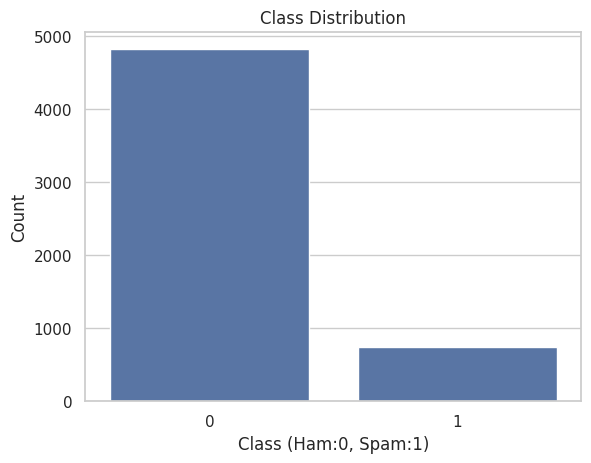

In [18]:
file_path = "/content/SMSSpamCollection"
# Update with the correct path
data = load_data(file_path)
data = preprocess_data(data)
sns.set(style="whitegrid")
plt.title("Class Distribution")
plt.xlabel("Class (Ham:0, Spam:1)")
plt.ylabel("Count")
sns.countplot(data,x='label')


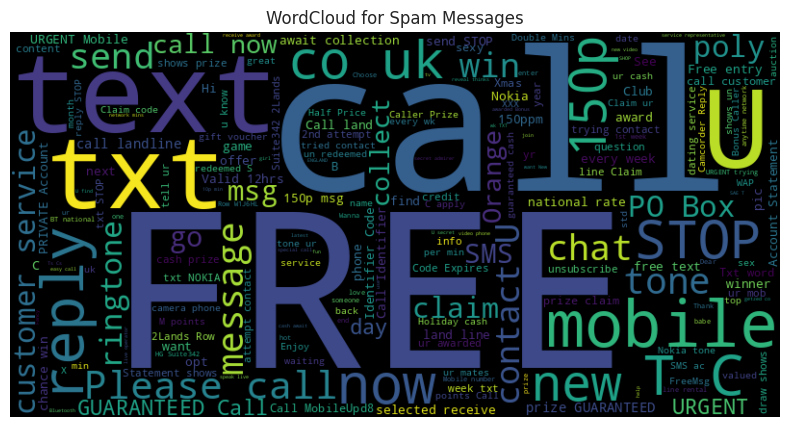

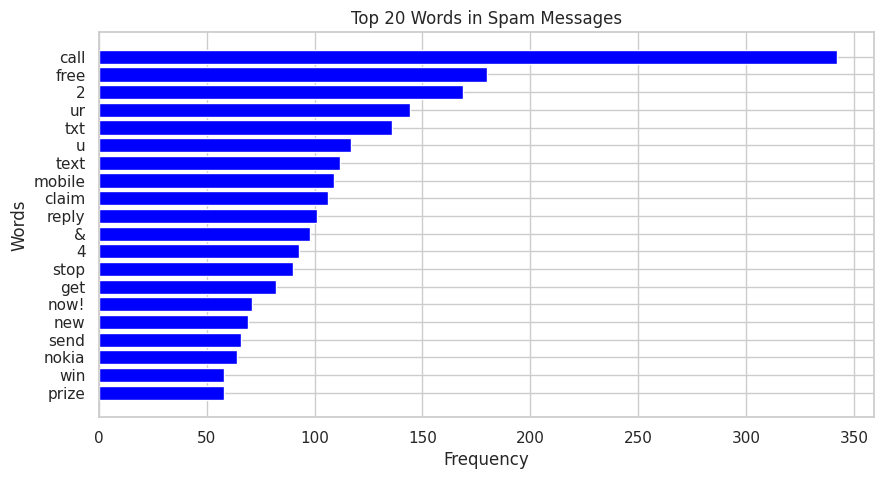

In [19]:
generate_wordcloud(data)
plot_top_words(data)

In [20]:
train_data, validation_data, test_data = split_data(data)
save_splits(train_data, validation_data, test_data)